# Laboratorio 2

------------

María Marta Ramirez Gil  21342                                   
Gustavo Andrés Gonzalez Pineda 21438  
Diego Leiva
Jose Pablo Orellana

Inteligencia Artificial                                                   
Universidad del Valle de Guatemala

------------

## Task 3

Importacion de librerias necesarias

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

Abrir y definir el dataset

In [82]:
df = pd.read_csv("LolDataSet.csv", sep=",")

Vista del dataset

In [5]:
n = int(input("ingrese el numero de rows:"))
df.head(n)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0


Informacion del dataset

In [7]:
tipos_de_datos = df.dtypes
print(tipos_de_datos)


gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64


In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

Encoding no necesario ya que la variable objetivo `blueWins` ya esta codificada como 1 para vistoria y 0 para derrota. Y no se necesecita para las demás variables.

Revisión de balanceo del dataset

blueWins
0    4949
1    4930
Name: count, dtype: int64


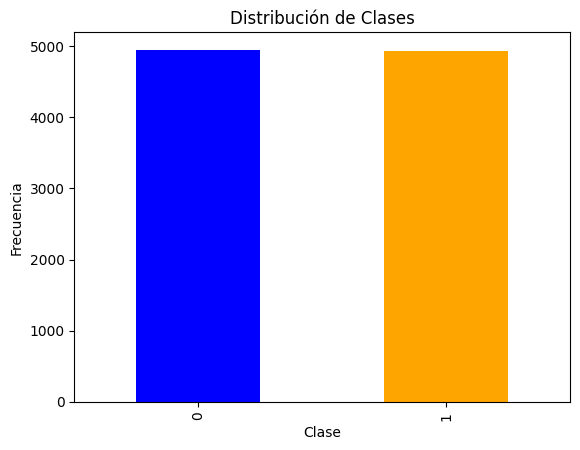

blueWins
0    50.096164
1    49.903836
Name: proportion, dtype: float64


In [6]:
class_distribution = df['blueWins'].value_counts()
print(class_distribution)

df['blueWins'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

class_percentage = df['blueWins'].value_counts(normalize=True) * 100
print(class_percentage)

Debido al modelo que se usara, las variables se ven bastante equilibradas y no se considera estrictamente necesario realizar un balanceo.

Escalar variables

In [83]:
variables_toScale = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueKills', 'blueDeaths', 'blueAssists',
                     'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
                     'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin',
                     'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redKills', 'redDeaths',
                     'redAssists', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled',
                     'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin',
                     'redGoldPerMin']

scaler = StandardScaler()

# Escalar las variables numericas
df[variables_toScale] = scaler.fit_transform(df[variables_toScale])

In [8]:
df.head(2)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,0.316996,-0.379275,1,0.935301,-0.046926,1.071495,0,0,...,0,0.052293,-0.410475,-0.763215,-0.928741,0.367685,-0.256228,-0.013342,-0.928741,0.052293
1,4523371949,0,-0.570992,-0.839069,0,-0.393216,-0.387796,-0.404768,0,0,...,1,0.758619,-0.410475,-0.436980,1.033784,0.068504,1.191254,0.593342,1.033784,0.758619


Modelo para clasificación - RandomForest

Precisión del modelo de Random Forest: 0.7206477732793523


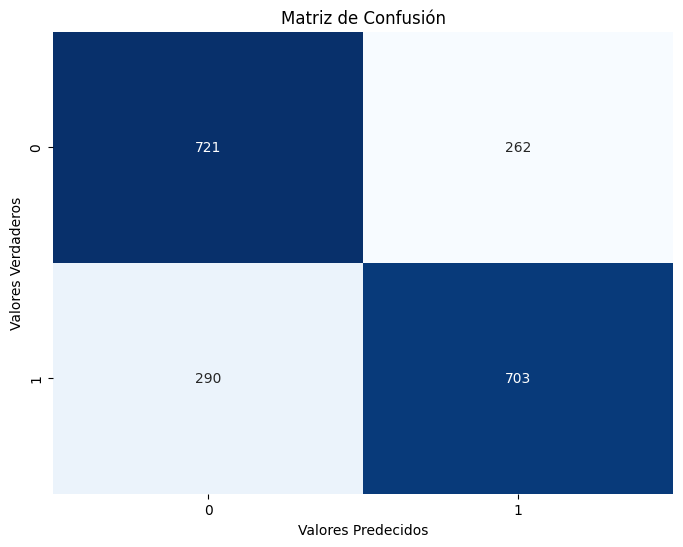

Precision: 0.7284974093264248
Recall: 0.7079556898288016
F1-score: 0.7180796731358529


In [9]:
# Dividir los datos en características y variable objetivo
X = df.drop('blueWins', axis=1)  # Características
y = df['blueWins']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importar el clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
rf_classifier.fit(X_train, y_train)

# Predecir con los datos de prueba y evaluar el rendimiento
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de Random Forest:", accuracy)

# Calcular la precision, el recall y el F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calcular la matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizacion de la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)

# Mostrar la grafica
plt.xlabel('Valores Predecidos')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')

plt.show()

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

#### Justificación de la elección de la métrica de desempeño principal:
Ya que se usó el modelo de RandomForestClassifer debido a que se tiene una tarea de clasificación binaria (si el equipo azul gana o no). Para visualizar el desempeño de este modelo, una métrica de matriz de confusion es una de las formas más comunes de representarlo. Ya que muestra explícitamente la distribucion de las predicciones del modelo en comparación con las etiquetas verdaderas y ademas proporciona una visión detallada del rendimiento del modelo.


## Task 3.1

### Sin usar librerias

Precisión del modelo SVM: 0.62


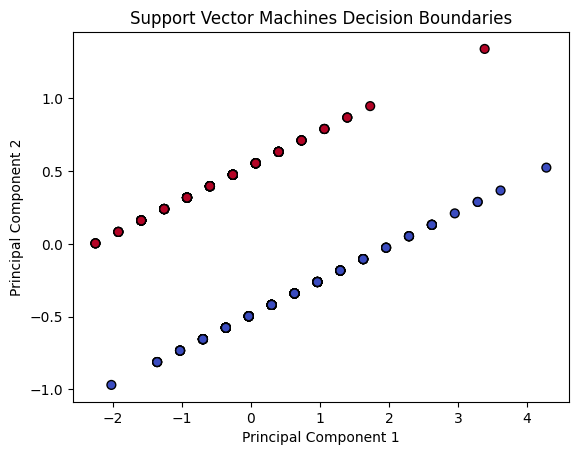

In [107]:
# Dividir el conjunto de datos en conjuntos de entrenamiento, validación y prueba
def train_val_test_split(X, y, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    num_samples = X.shape[0]
    
    # Tomar una muestra aleatoria de los datos
    sample_size = min(num_samples, 500)  # Tomamos una muestra de hasta 500 muestras
    sample_indices = np.random.choice(num_samples, sample_size, replace=False)
    X_sample = X[sample_indices]
    y_sample = y[sample_indices]
    
    num_train = int(train_ratio * sample_size)
    num_val = int(val_ratio * sample_size)
    num_test = int(test_ratio * sample_size)
    
    # Permutar los indices para dividir aleatoriamente los datos.
    indices = np.random.permutation(sample_size)
    train_indices = indices[:num_train]
    val_indices = indices[num_train:num_train + num_val]
    test_indices = indices[-num_test:]
    
    X_train, y_train = X_sample[train_indices], y_sample[train_indices]
    X_val, y_val = X_sample[val_indices], y_sample[val_indices]
    X_test, y_test = X_sample[test_indices], y_sample[test_indices]
    
    return X_train, X_val, X_test, y_train, y_val, y_test

class LinearSVM:
    def __init__(self, learning_rate=0.01, max_iter=1000, C=1):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.C = C

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.max_iter):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.C * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * self.C * self.weights - np.dot(x_i, y[idx]))
                    self.bias -= self.learning_rate * y[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) - self.bias
        return np.sign(linear_output)
    
    def decision_function(self, X):
        return np.dot(X, self.weights) - self.bias


# Entrenamiento del modelo SVM
def train_svm(X_train, y_train):
    svm_classifier = LinearSVM()
    svm_classifier.fit(X_train, y_train)
    return svm_classifier

# Evaluacion del modelo SVM
def evaluate_svm(svm_classifier, X_test, y_test):
    # Realizar predicciones en el conjunto de prueba
    predictions = svm_classifier.predict(X_test)
    # Calcular la precisión manualmente
    accuracy = np.mean(predictions == y_test)
    return accuracy

# Graficacion 
def plot_groups(X, y, svm_classifier):
    # Reducir la dimensionalidad de los datos a 2 dimensiones utilizando el PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Dibujar los puntos de datos
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=40)
    
    # Dibujar las fronteras de decision
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
  
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm_classifier.decision_function(xy).reshape(XX.shape)
    
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Support Vector Machines Decision Boundaries')
    
    # Mostrar el gráfico
    plt.show()

# Utilizar los datos del DataFrame de LOL
# Suponiendo que df ya está definido con las variables "redKills" y "blueWins"
X = df[['redKills', 'blueWins']].values  
y = df['blueWins'].values  # Se selecciona la columna 'blueWins' como variable objetivo.

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y)

# Entrenar el modelo SVM
svm_classifier = train_svm(X_train, y_train)

# Evaluar el modelo final SVM
accuracy = evaluate_svm(svm_classifier, X_test, y_test)
print("Precisión del modelo SVM:", accuracy)

# Graficar los grupos encontrados
plot_groups(X_train, y_train, svm_classifier)

#### Consideraciones Extra
- Se tuvo que reducir la dimensionalidad de las variables a 2 dimensiones utilizando Analisis de Componentes Principales (PCA), para presentar una mejor grafica dentro del plano cartesiano.
- Se tuvo que elgir una muestra aleatoria del dataset, ya que escoger todos los datos seria muy cargado para el modelo.

### Usando Librerias

Precisión del modelo SVM: 1.0


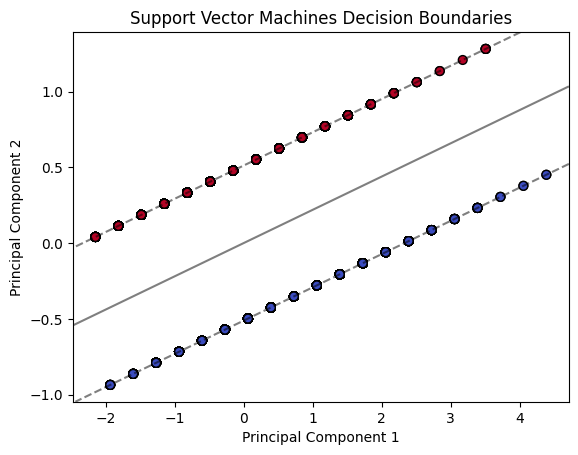

In [111]:
# Dividir el conjunto de datos en conjuntos de entrenamiento, validación y prueba
def train_val_test_split(X, y, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio/(train_ratio+val_ratio), random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Graficacion 
def plot_groups(X, y, svm_classifier):
    # Reducir la dimensionalidad de los datos a 2 dimensiones utilizando el PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Entrenar el clasificador SVM
    svm_classifier.fit(X_pca, y)
    
    # Dibujar los puntos de datos
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=40)
    
    # Dibujar las fronteras de decision
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
  
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm_classifier.decision_function(xy).reshape(XX.shape)
    
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Support Vector Machines Decision Boundaries')
    
    # Mostrar el gráfico
    plt.show()

# Entrenar el clasificador SVM
svm_classifier.fit(X_train, y_train)

# Calcular la precisión del modelo en los datos de prueba
accuracy = svm_classifier.score(X_test, y_test)

# Imprimir la precisión del modelo
print("Precisión del modelo SVM:", accuracy)

# Utilizar los datos del DataFrame de LOL
X = df[['redKills', 'blueWins']].values  
y = df['blueWins'].values  # Se selecciona la columna 'blueWins' como variable objetivo.

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y)

# Crear un clasificador SVM lineal
svm_classifier = SVC(kernel='linear', C=1)

# Graficar los grupos encontrados
plot_groups(X_train, y_train, svm_classifier)

#### Cual implementacion fue mejor?
Consideramos que ambas implementaciones revelan ventajas significativas en términos de eficiencia y precisión para el enfoque que utiliza la biblioteca `sklearn`. En lo que respecta a la velocidad de ejecución, la implementación con la librería proporcionó resultados más rápidos en comparación con el algoritmo sin librerías, lo que sugiere una optimización y eficacia naturales al emplear herramientas especializadas. En cuanto a la precisión, los resultados obtenidos fueron igualmente reveladores. Mientras que la implementación sin librerías alcanzó una precisión máxima de 0.62, la versión basada en sklearn logró un puntaje perfecto de 1.0, indicando una capacidad de clasificación superior y una mejor generalización del modelo a datos nuevos. En conclusión, consideramos que la implementación utilizando la biblioteca sklearn supera en términos de eficiencia precisión y desempeño, lo que respalda su idoneidad para aplicaciones prácticas y análisis rigurosos en entornos de aprendizaje automático.